#  Biodiversity Project

# Introduction
It's a project to analysize data for the National Parks Service.  
Data:
1.  `species_info.csv` with data about different species in our National Parks
2.  `observations.csv` with data about different observations of species in different national parks

Tasks:
1. Inspect and create a bar chart for species number of different conservation_status.
2. Using significance test (`chi squared test`) to answer question whether certain types of species more likely to be endangered?
3. Determine different number of observations per month for certain animal species in different national park 


# Import the modules:

In [42]:
from matplotlib import pyplot as plt
import pandas as pd 
from scipy.stats import chi2_contingency

# Import CSV files
Two CSV files. `species_info.csv` with data about different species in our National Parks, including:
- The scientific name of each species
- The common names of each species
- The species conservation status

`observations.csv` with data about different observations of species in different national parks:

In [4]:
species = pd.read_csv('species_info.csv')
observations=pd.read_csv('observations.csv')

Inspect each DataFrame using `.head()`.

In [86]:
species.head()
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Basic Analysis of  `species_info.csv`

How many different species are in the `species` DataFrame?

In [6]:
species.scientific_name.nunique()

5541

What are the different values of `category` in `species`?

In [7]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

What are the different values of `conservation_status`?

In [8]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

# Analysis of  `conservation_status`
The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

Count up how many species meet each of these criteria.  

In [9]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


Only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Using `.fillna` to fill `None` as `No Intervention`


In [10]:
species.fillna( "No Intervention", inplace=True)

In [87]:
species.groupby('conservation_status').scientific_name.nunique().reset_index()


,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,No Intervention,5363
3,Species of Concern,151
4,Threatened,10


Use `plt.bar` to create a bar chart.  Sort the columns by how many species are in each categories using `.sort_values`. 

In [88]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
protection_counts

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


Bar Chart: 

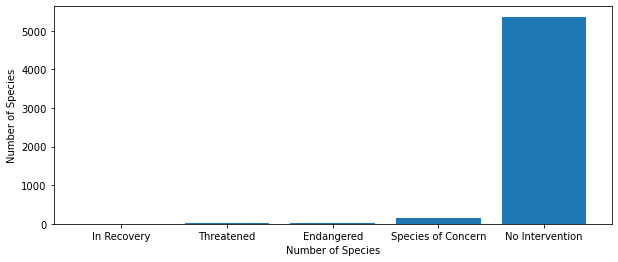

In [79]:
plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts.index)), protection_counts.scientific_name.values )
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.xlabel('Number of Species')
plt.ylabel('Number of Species')

plt.show()

# Question: Are certain types of species more likely to be endangered?


Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [84]:
species['is_protected'] = species.conservation_status.apply(lambda x: True if x != 'No Intervention' else False)
species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
...,...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False,False


group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name`s in each grouping.

In [27]:
category_counts = species.groupby(['category','is_protected']).scientific_name.nunique().reset_index()

In [28]:
category_counts.head()

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:

In [34]:
category_pivot = category_counts.pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                                .reset_index()

In [35]:
category_pivot.head()

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [37]:
category_pivot.columns = ['category', 'not_protected', 'protected']
category_pivot.head()

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5


Let's create a new column of `category_pivot` called `percent_protected`, which is equal to `protected` (the number of species that are protected) divided by `protected` plus `not_protected` (the total number of species).

In [38]:
category_pivot [ 'percent_protected'] = category_pivot.protected / (category_pivot.protected+category_pivot.not_protected)

In [90]:
category_pivot

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


# Significance test (`chi squared test`)
It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  I am going to do a significance test to see if this statement is true. 

In [44]:
contingency = [[30, 146],
              [75, 413]]

run `chi2_contingency` with `contingency`.

In [45]:
chi2_contingency(contingency)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

It looks like this difference isn't significant!

I am going to do another test between `Reptile` and `Mammal`?

In [91]:
chi2_contingency([[5,73],[30,146]])

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 10.7480315,  67.2519685],
        [ 24.2519685, 151.7480315]]))

It looks like there is a significant difference between `Reptile` and `Mammal`. They are different. Category `Mammal` are more likely to be endangered than species in `Reptile`

# Question: How many total sheep observations (across all three species) were made at each national park?  

Conservationists have been recording sightings of different species at several national parks for 1 month. Their observations is in a file called `observations.csv` (loaded above)

In [92]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


I am going to study the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  I'd like to know which rows of `species` are referring to sheep. 

Create a new column in `species` called `is_sheep` which is `True` if the `common_names` contains `'Sheep'`, and `False` otherwise.

In [60]:
species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

In [65]:
species[species.is_sheep]

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.

In [93]:
sheep_species=species[(species['is_sheep']==True) & (species['category']=='Mammal')]
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Merge `sheep_species` with `observations` to get a DataFrame with observations of sheep. Save this DataFrame as `sheep_observations`.

In [107]:
sheep_observations = sheep_species.merge(observations)
sheep_observations.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219
5,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Bryce National Park,109
6,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yosemite National Park,117
7,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Great Smoky Mountains National Park,48
8,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yellowstone National Park,67
9,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yosemite National Park,39


Use `groupby` to get the `sum` of `observations` for each `park_name`. 

In [106]:
obs_by_park= sheep_observations.groupby('park_name').observations.sum().reset_index ()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


Create a bar chart showing the different number of observations per month at each park.

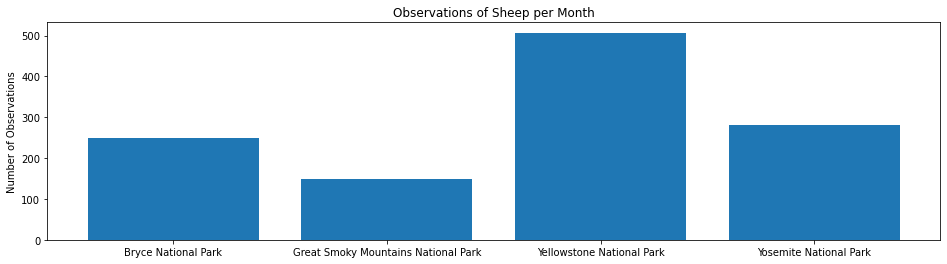

In [108]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park.index)),
        obs_by_park.observations.values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Month')
plt.show()

# Summary:
This project use pandas, scipy and matplot to manipulate the dataframe and plot the data. Also I used significant test (`chi squared test`) to show whether the outcomes of two categorical variables are associated. 